In [1]:
#importing libraries
import pandas as pd
import numpy as np
import os

# Plotting libraries
import matplotlib.pyplot as plt


# SKLearn libraries
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

# Tensorflow libraries
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.initializers import HeNormal


In [2]:
#downloading data
!wget "https://raw.githubusercontent.com/jbrownlee/Datasets/master/housing.csv"

--2024-01-05 17:44:49--  https://raw.githubusercontent.com/jbrownlee/Datasets/master/housing.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.108.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 41295 (40K) [text/plain]
Saving to: ‘housing.csv’

housing.csv         100%[===================>]  40.33K  --.-KB/s    in 0.02s   

2024-01-05 17:44:50 (2.62 MB/s) - ‘housing.csv’ saved [41295/41295]



In [3]:
#loading data
data = pd.read_csv('housing.csv')

In [4]:
data.head()

,0.00632,18.00,2.310,0,0.5380,6.5750,65.20,4.0900,1,296.0,15.30,396.90,4.98,24.00
0,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
1,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
2,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
3,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2
4,0.02985,0.0,2.18,0,0.458,6.430,58.7,6.0622,3,222.0,18.7,394.12,5.21,28.7


In [5]:
#choosing feature and target variables
X = data.iloc[:,0:-1]
y = data.iloc[:,-1]

In [6]:
#splitting dataset for training and testing
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.33,random_state = 0)

In [7]:
X_train.shape

(338, 13)

In [8]:
y_train.shape

(338,)

In [9]:
initializer = tf.keras.initializers.HeNormal()

In [10]:
#creating model
def get_model():
    model = Sequential([
        keras.layers.Input(shape=X_train.shape[1:]),
        keras.layers.Dense(34, activation='relu', kernel_initializer='he_normal'),
        keras.layers.Dense(1, activation='linear')
    ])

    return model

In [11]:
model = get_model()

In [12]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 34)                476       
                                                                 
 dense_1 (Dense)             (None, 1)                 35        
                                                                 
Total params: 511 (2.00 KB)
Trainable params: 511 (2.00 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [13]:
#compile model
model.compile(optimizer='adam',
              loss='mse')

In [14]:
#fitting model
history = model.fit(X_train, y_train, epochs=150, batch_size=32, validation_data=(X_test, y_test), verbose=1)

Epoch 1/150
11/11 [==============================] - 6s 70ms/step - loss: 689.0037 - val_loss: 508.7612
Epoch 2/150
11/11 [==============================] - 0s 9ms/step - loss: 334.9942 - val_loss: 294.9612
Epoch 3/150
11/11 [==============================] - 0s 14ms/step - loss: 230.9836 - val_loss: 184.0608
Epoch 4/150
11/11 [==============================] - 0s 15ms/step - loss: 184.7222 - val_loss: 161.5197
Epoch 5/150
11/11 [==============================] - 0s 20ms/step - loss: 155.4710 - val_loss: 122.3791
Epoch 6/150
11/11 [==============================] - 0s 29ms/step - loss: 126.5957 - val_loss: 106.0029
Epoch 7/150
11/11 [==============================] - 0s 30ms/step - loss: 112.5079 - val_loss: 95.5161
Epoch 8/150
11/11 [==============================] - 0s 13ms/step - loss: 97.7556 - val_loss: 79.3818
Epoch 9/150
11/11 [==============================] - 0s 11ms/step - loss: 90.2787 - val_loss: 76.1618
Epoch 10/150
11/11 [==============================] - 0s 22ms/step - l

In [15]:
#model evaluation
model.evaluate(X_test, y_test, verbose=0)

29.0831241607666

In [16]:
mse = model.evaluate(X_test, y_test, verbose=0)
print('Mean Squared Error: {:.2f}%'.format(mse))

Mean Squared Error: 29.08%


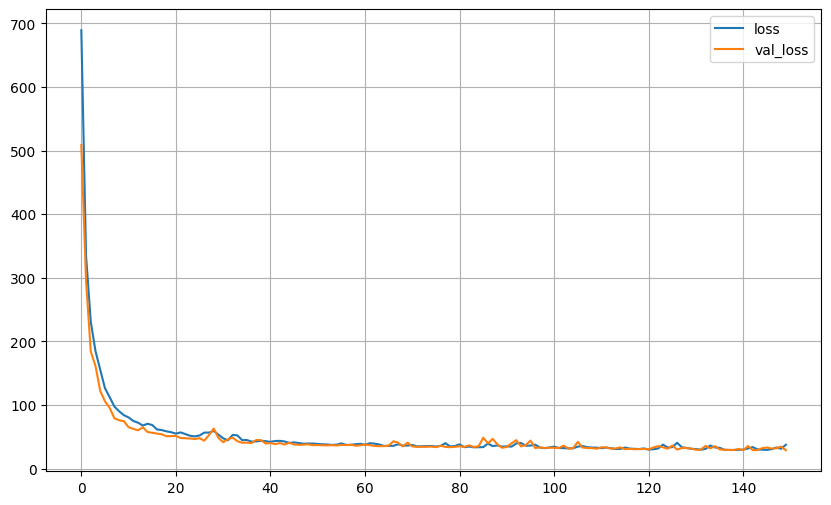

In [17]:
#loss and mse vs epochs
pd.DataFrame(history.history).plot(figsize=(10,6))
plt.grid(True)
#plt.gca().set_ylim(0, 1)
plt.show()